In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files


In [9]:
uploaded = files.upload()

Saving background.jpeg to background (1).jpeg


In [12]:
image = cv2.imread("C:\\Users\\aayus\\Downloads\\background.jpeg")

In [17]:
image = cv2.imread(list(uploaded.keys())[0])

if image is None:
    print("Error: Could not load image. Please check the file name and try again.")
else:
    scale_percent = 80
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

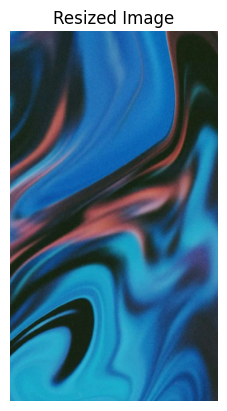

In [19]:
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("Resized Image")
plt.axis('off')
plt.show()

In [21]:
refPt = [(width//2 - 50, height//2 - 50), (width//2 + 50, height//2 + 50)]
roi = image[refPt[0][1]:refPt[1][1], refPt[0][0]:refPt[1][0]]

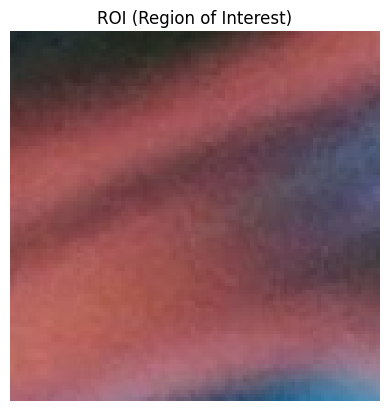

In [22]:
roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
plt.imshow(roi_rgb)
plt.title("ROI (Region of Interest)")
plt.axis('off')
plt.show()

In [23]:
hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
havg = np.average(hsv, axis=0)
h_avg = np.average(havg, axis=0)
print("Average HSV values:", h_avg)

Average HSV values: [110.8493 101.7949 133.1239]


In [24]:
greenLower = (90, 100, 75)
greenUpper = (100, 180, 200)

if (greenLower[0] < h_avg[0] < greenUpper[0] and
    greenLower[1] < h_avg[1] < greenUpper[1] and
    greenLower[2] < h_avg[2] < greenUpper[2]):
    print("✅ Color is green")
else:
    print("❌ Color is not green")

❌ Color is not green
